# Exercise Organization
**Philipp Becker** (philipp.becker@kit.edu)

## General Information 
- 6 Exercises in total (each 20pt)
- Will be published bi-weekly, 2 weeks to work on each. 
- One grading per team
- Bonus for $\geq 60\%$ of points (i.e. $\geq 72pt$)

## Exercise Format

The exercise sheets come in form of Jupyter notebooks, which consist of different cells.
These can be used for markdowns (like this cell) or Python code.
Each cell can be run separately to present the text properly or to execute the code.
It is also possible to use $\LaTeX$ equations inside the markdown environment.
For more information about how to install and start Jupyter, visit https://jupyter-notebook.readthedocs.io/en/stable/

The given Jupyter notebook should be filled out by where it is marked.
There are either pen and paper questions to answer or programming tasks to code.
You should answer the programming tasks inside this notebook.
The theoretical questions can be answered here as well using the Markdown cells.
It is also possible to answer them by pen and paper and scan the solution as a pdf.

## Hand In
- Hand In is over Ilias. 
- Only one person per group needs to hand it in, but please still put the names of all three
- Deadline just before the presentation of the solution 

Handing in Notebooks:

For the submission of the exercise please follow these steps: 

1. Make sure that every cell is executed and the output is printed.
2. Create a PdF of the Jupyter notebook via *File $\rightarrow$ Download as $\rightarrow$ PDF via LaTeX (.pdf)* or
 *File $\rightarrow$ Print Preview $\rightarrow$ Use your favorite PDF printing program*
3. Zip your created PdF file and your original notebook, i.e. the .ipynb file,
as well as your separate pen and paper solutions (if existent) together.
4. Rename your zip file with the following naming convention: group_y_uxxxx_uxxxx_uxxxx
where y is your group number, uxxxx is the kit user from each group member/
5. Upload the zip file to Ilias. 

**Caveat**: Last year there were some issues with formulas in the exercises not "compiling" for some students. We try to make sure it works on our systems but, as there are differences between tex versions and different operating systems we can not always guarantee it. **If some of our equations do not work for you, just delete it from your hand-in** 

# Intro to (Scientific) Python 

In Machine Learning we often have to deal with vectors, matrices, or higher-order tensors of data. For example, in my work, I often have to deal with sets of sequences of images, i.e., a 5 D tensor. So we need a library that allows easy and efficient manipulations of such structures. For the exercises, we are mostly going to use NumPy. (https://numpy.org/devdocs/user/quickstart.html) 

Note however that most of the basic principles introduce are also used by more recent Deep Learning Frameworks (e.g., TensorFlow, PyTorch, Jax) and also in other programming languages, serving a similar purpose (e.g., Matlab or Julia).

## Basic Operation on Matrices and Vectors in NumPy

Create a matrix <br>
\begin{align*}A =
\begin{pmatrix}
    1 & 2 & 3 \\
    4 & 2 & 6 \\
    7 & 3 & 8
\end{pmatrix}
\end{align*}
and the vectors <br>

\begin{align*} v =
\begin{pmatrix}
    3  \\
    1  \\
    2
\end{pmatrix}, ~w =
\begin{pmatrix}
    1  \\
    1  \\
    2
\end{pmatrix}
\end{align*}



In [25]:
from typing import Tuple
# we will usually use the numpy library:
import numpy as np

# Let us create a matrix A and vectors v and w:
A = np.array([[1,2,3], [4,2,6], [7, 3, 8]])
v = np.array([3, 1, 2])
w = np.array([1,1,2])
print("Matrix A: (Shape {})".format(A.shape))
print(A)
print("Vector v: (Shape {})".format(v.shape))
print(v)
print("Vector w: (Shape {})".format(w.shape))
print(w)



Matrix A: (Shape (3, 3))
[[1 2 3]
 [4 2 6]
 [7 3 8]]
Vector v: (Shape (3,))
[3 1 2]
Vector w: (Shape (3,))
[1 1 2]


Now that we have a matrix and some vectors, let's see what we can do with them 

In [26]:
# Accessing Elements 
print("Single Entry of Vector:", w[2])
print("Single Entry of Matrix:", A[0, 1])
print("Column of Matrix:", A[:, 0])
print("Row of Matrix:", A[1, :])





Single Entry of Vector: 2
Single Entry of Matrix: 2
Column of Matrix: [1 4 7]
Row of Matrix: [4 2 6]


In [27]:
# We can perform general element-wise operations...
print("Addition:", v + w)
print("Multiplication:", v * w)
print("Square Root of Squared Vector:", np.sqrt(v**2))
print("Scalar times matrix: \n", 2*A)
print("----------------------------")

Addition: [4 2 4]
Multiplication: [3 1 4]
Square Root of Squared Vector: [3. 1. 2.]
Scalar times matrix: 
 [[ 2  4  6]
 [ 8  4 12]
 [14  6 16]]
----------------------------


In [28]:
# And also matrix vector and matrix matrix products  
print("Matrix Vector Product:", A @ v)
print("Matrix Matrix Product: \n", A @ A)

Matrix Vector Product: [11 26 40]
Matrix Matrix Product: 
 [[ 30  15  39]
 [ 54  30  72]
 [ 75  44 103]]


## Broadcasting 

First, print things out agian so we know what we are talking about 

In [7]:
print("Matrix A: (Shape {})".format(A.shape))
print(A)
print("Vector v: (Shape {})".format(v.shape))
print(v)
print("Vector w: (Shape {})".format(w.shape))
print(w)

Matrix A: (Shape (3, 3))
[[1 2 3]
 [4 2 6]
 [7 3 8]]
Vector v: (Shape (3,))
[3 1 2]
Vector w: (Shape (3,))
[1 1 2]


Let's try something weird and and subtract a vector from a matrix

In [29]:
print(A - v)

[[-2  1  1]
 [ 1  1  4]
 [ 4  2  6]]


As we see, Python did not give us an error but did something - it subtracted the vector from each row of the matrix. This mechanism is called **broadcasting** and it will be your new best friend (you will sometimes also hate it)! 

In general, if the shapes of two numpy arrays do not match, but the non-matching dimension is "1" for either of the arrays the values along that dimension will be broadcasted. Here, numpy implicitly added a axis of size 1 to the vector "v" and broadcasted the values of "v" to all rows of A. This implicity broadcasting can be a bit counter intuitive and be a source for error.

Yet, broadcasting is a very important tool to efficiently combine data in the ways you need to and you will see many applications througout the exercises. As a general tip: **never** use "for-loops" to manipulate your arrays but try to find a way using broadcasting - it is just much much faster. We might deduce points in the exercises for avoidalbe for-loops.

So let's do the broadcasting more explicitly: 

In [9]:
v1 = v[np.newaxis, :] # equivalent to v[None, :], np.reshape(v, (1, 3))
print("Shape:", v1.shape)
print("Subtraction: \n", A - v1)

Shape: (1, 3)
Subtraction: 
 [[-2  1  1]
 [ 1  1  4]
 [ 4  2  6]]


If we want to subtract the vector from each column instead of each row, we need to broadcast along the other axis! 

In [10]:
v2 = v[:, np.newaxis] # equivalent to v[:, None], np.reshape(v, (3, 1))
print("Shape:", v2.shape)
print("Subtraction: \n", A - v2)

Shape: (3, 1)
Subtraction: 
 [[-2 -1  0]
 [ 3  1  5]
 [ 5  1  6]]


**Tip**: Always broadcast explicitly. Implict broadcasting is a great source for really nasty bugs.

## Small Example: Gaussian Maximum Likelihood
Lets begin by loading some data and look at the size. 

In [11]:
samples = np.load("data.npz")["samples"]
print("Shape:", samples.shape)


Shape: (150, 2)


So we have 150 two dimensional data points - let's plot them. We use matplotlib, argubly the most common python plotting library, for that. In the exercise most plotting functionality will be provided but we recommend you take a look at it anyway.  

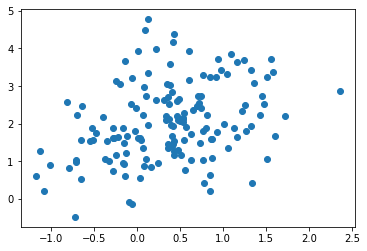

In [12]:
import matplotlib.pyplot as plt
plt.scatter(samples[..., 0], samples[..., 1])

That looks Gaussian distributed, lets try to fit a Gaussian on it. Recall that the maximum likelihood estimator for a Multivariate Gaussian Distribution is given by
$$ \mu = \dfrac{1}{N} \sum_{i}^N x_i \quad \quad \Sigma = \dfrac{1}{N} \sum_{i}^N (x_i - \mu) (x_i - \mu)^T. $$
(**Caveat**: The Maximum Likelihood estimator for Gaussian Distributions shouldn't be new to you but it will also be covered agian later in the lecture.)

We will now look at a few implementations for that: 

In [18]:
def fit_ml_broadcasting(samples: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    Gaussian Maximum Likelihood Estimator
    :param samples: samples to fit on shape [num_samples x dimenson]
    return: mean (shape: [dimension]) and covariance (shape: [dimension x dimension])
    """
    
    # get amount of samples
    num_samples = samples.shape[0]
    # mean
    mean = 1 / num_samples * np.sum(samples, axis=0)
    
    # covariance
    diff = samples - mean
    print("Diff Shape", diff.shape)
    # Use Broadcasting to compute outer products 
    #                shape: [n x 1 x d]       shape: [n x d x 1]
    outer_products = diff[:, np.newaxis, :] * diff[..., None]
    print("Outer Products shape", outer_products.shape)
    cov = 1 / num_samples * np.sum(outer_products, axis=0)
    
    return mean, cov 

mean, cov = fit_ml_broadcasting(samples=samples)
print("mean:", mean, "\ncovariance: \n", cov)



    

Diff Shape (150, 2)
Outer Products shape (150, 2, 2)
mean: [0.36929114 2.03633886] 
covariance: 
 [[0.42608419 0.22163012]
 [0.22163012 1.03858502]]


In [31]:
def fit_ml_outer_prod(samples: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    Gaussian Maximum Likelihood Estimator
    :param samples: samples to fit on shape [num_samples x dimenson]
    return: mean (shape: [dimension]) and covariance (shape: [dimension x dimension])
    """
    
    # get amount of samples
    num_samples = samples.shape[0]
    # mean
    mean = 1 / num_samples * np.sum(samples, axis=0)
    
    # covariance
    diff = samples - mean
    
    summed_outer_products = diff.T @ diff 
    
    cov = 1 / num_samples * summed_outer_products
    
    return mean, cov 

mean, cov = fit_ml_outer_prod(samples=samples)
print("mean:", mean, "\ncovariance: \n", cov)



mean: [0.36929114 2.03633886] 
covariance: 
 [[0.42608419 0.22163012]
 [0.22163012 1.03858502]]


Ok, same result. 

Of course, there is also some preimplemented functionality for that in numpy that you should always use in "real-life": 

In [32]:
def fit_ml_numpy(samples: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    Gaussian Maximum Likelihood Estimator
    :param samples: samples to fit on shape [num_samples x dimenson]
    return: mean (shape: [dimension]) and covariance (shape: [dimension x dimension])
    """
    return np.mean(samples, axis=0), np.cov(samples, rowvar=False, bias=True)

mean, cov = fit_ml_numpy(samples=samples)
print("mean:", mean, "\ncovariance: \n", cov)


mean: [0.36929114 2.03633886] 
covariance: 
 [[0.42608419 0.22163012]
 [0.22163012 1.03858502]]


Again, same results... seems like we implemented it correctly!

### Gaussian Density Function

For further demonstration and to generate some nice plots, lets implement the Gaussian density function. 
Recall that the density of the Multivariate Gaussian Distribution is given by

$$ p(x) = \mathcal{N}\left(x | \mu, \Sigma \right) = \dfrac{1}{\sqrt{\det \left(2 \pi \Sigma\right)}} \exp\left( - \dfrac{(x-\mu)^T \Sigma^{-1} (x-\mu)}{2}\right) $$


In [22]:
def mvn_pdf(x, mu, sigma):
    """
    Density of the Multivariate Normal Distribution
    :param x: samples
    :param mu: mean
    :param sigma: covariance
    :return p(x) with p(x) = N(mu, sigma)
    """
    det = np.linalg.det(2 * np.pi * sigma)
    norm_term = 1 / np.sqrt(det)

    
    diff = x - mu   # shape (n, d)
    
    t1 = np.linalg.solve(sigma, diff.T) # sigma of shape (d, d), diff.T of shape (d, n) -> t1 of shape(d, n)
    t2 = t1.T * diff  
    exp_term = np.sum(t2, axis=-1)
        
    return norm_term * np.exp(-0.5 * exp_term)

**Practical Aspect:** In practice you would never implement it like that, but stay
in the log-domain. Also for numerically stable implementations of the multivariate normal density the symmetry and
positive definitness of the covariance should be exploited by working with it's Cholesky decomposition.

Plot Grid Shape: (160, 90, 2)
Flat Grid Shape: (14400, 2)


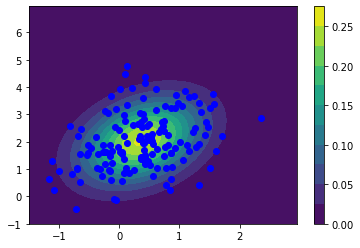

In [23]:
x_range = np.arange(-1.5, 3, 0.05)  # x range for plotting
y_range = np.arange(-1, 7, 0.05)    # y range for plotting 

# generate a grid of 2d data points along which we will evaluate the density 
plt_grid = np.stack(np.meshgrid(x_range, y_range), axis=-1)
print("Plot Grid Shape:", plt_grid.shape)
# flatten the grid so we can feed it to our function but remember the shape
flat_plt_grid = np.reshape(plt_grid, [-1, 2])
print("Flat Grid Shape:", flat_plt_grid.shape)
plt_grid_shape = plt_grid.shape[:2]

flat_densities = mvn_pdf(x=flat_plt_grid, 
                         mu=mean,
                         sigma=cov),

# get the values back in shape
densities = np.reshape(flat_densities, plt_grid_shape)

# plot
plt.contourf(plt_grid[..., 0], plt_grid[..., 1], densities, levels=10)
plt.colorbar()

s0 = plt.scatter(samples[..., 0], samples[..., 1], color="blue")


Lets look at that in log space

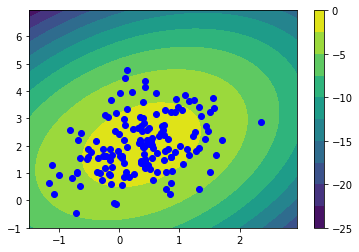

In [24]:
plt.contourf(plt_grid[..., 0], plt_grid[..., 1], np.log(densities), levels=10)
plt.colorbar()

s0 = plt.scatter(samples[..., 0], samples[..., 1], color="blue")

# Further Resources

- http://scipy-lectures.org/
- https://nbviewer.org/github/jrjohansson/scientific-python-lectures/tree/master/ (Especially https://nbviewer.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-2-Numpy.ipynb)
- ... just have a look yourself, there is plenty of resources out there. 